# Caviar

# Imports

#### Standard library imports

In [1]:
import sys

#### Third party imports

In [2]:
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt

#### Local application imports

In [3]:
sys.path.append("../../")

In [60]:
%load_ext autoreload
%autoreload 2

from adj_matrix.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

## Obtaining data

In [5]:
phases, G = download_caviar_data()

In [6]:
phases

{1:      n1  n4  n89  n83  n3  n5  n88  n85  n90  n2  n7  n54  n6  n64  n8
 n1    0   1    4    0   4   2    2    9    1   2   0    2   0    1   1
 n4    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n89   1   0    0    0   0   0    0    0    0   0   3    0   0    0   0
 n83   1   0    0    0   0   0    0    0    0   0   0    0   5    0   0
 n3    2   0    0    0   0   0    1    0    0   0   0    0   0    0   0
 n5    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n88   1   0    0    0   1   0    0    3    0   0   0    0   1    0   0
 n85   1   0    0    0   0   0    2    0    0   0   0    0   5    0   0
 n90   0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n2    0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n7    0   0    2    0   0   0    0    0    0   0   0    0   0    0   0
 n54   0   0    0    0   0   0    0    0    0   0   0    0   0    0   0
 n6    0   0    0    0   0   0    1    0    0   0   0    0   

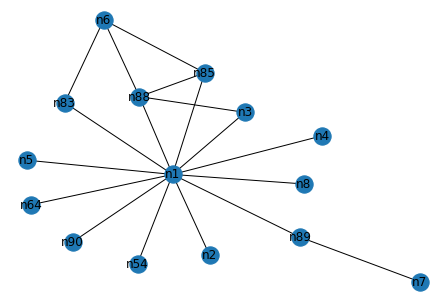

In [9]:
num = 1
nx.draw(
    G[num],
    pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
    with_labels=True
)

# Contenido del reporte

## Introducción

Caviar se refiere a una investigación criminal coordinada por autoridades de Canadá durante los años 1994 a 1996. El objetivo de esta investigación era entender las interacciones entre los distintos criminales que operaban en Canadá. Durante el periodo de dos años, las autoridades canadienses intervinieron 11 veces las comunicaciones de los criminales para entender como se relacionaban. Se generó un conjunto de datos distinto con cada una de estas intervenciones.

Los datos de esta investigación permiten analizar los cambios en la red de criminales a través del tiempo y el cambio de circunstancias. Se dio seguimiento a un total de 110 criminales, de los cuales 82 eran traficantes de drogas y 28 no traficantes.

## Matriz de adjacencia

### ¿Cómo está configurada la matriz de adjacencia?

Dado que se trata de un caso **no dirigido**, se elaboraron 11 matrices **simétricas de adyacencia**. Cada matriz relaciona al grupo de criminales con base en interacciones entre ellos.

Extracto de una matriz de adyacencia:

In [10]:
phases[1]

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8
n1,0,1,4,0,4,2,2,9,1,2,0,2,0,1,1
n4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n89,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0
n83,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0
n3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
n5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n88,1,0,0,0,1,0,0,3,0,0,0,0,1,0,0
n85,1,0,0,0,0,0,2,0,0,0,0,0,5,0,0
n90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
n2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploración general

### ¿Cómo fueron evolucionando las matrices de adjacencia? (nodos y conexiones)

Comenzamos explorando las matrices de adyacencia y como estas fueron evolucionando a lo largo de los 11 cortes de tiempo (intervenciones). A continuación se presenta una gráfica con un conteo del número de nódos y conexiones a través del tiempo:

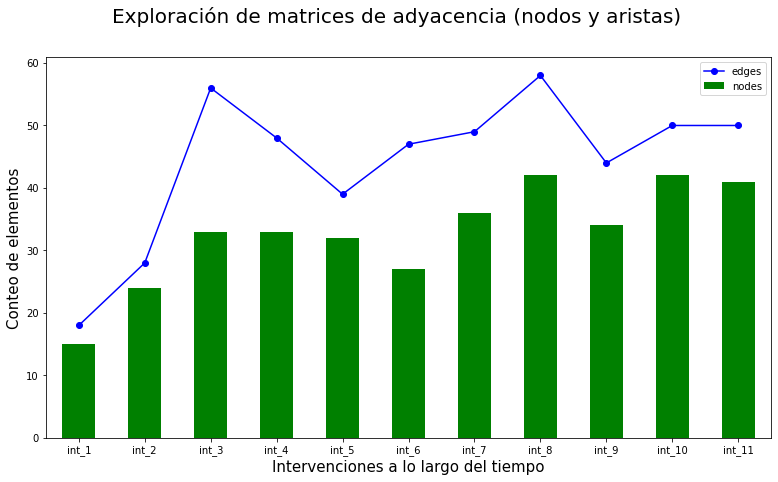

In [61]:
adys_in_time_plot(G)

Es interesante notar

## Caracteristicas globales

### ¿Qué criminal podría ser considerado como la mente maestra de esta red?
- eigenvector

#### Cálculo para cada una de las épocas

In [ ]:
dict_x = {}

for num in G:
    dfx = pd.DataFrame.from_dict(nx.eigenvector_centrality(G[num]), orient="index")
    dfx.sort_values(by=0, ascending=False, inplace=True)
    dfx.reset_index(inplace=True)
    dfx[num] = dfx.apply(lambda x: (x["index"], round(x[0], 2)), axis = 1)
    dfx = dfx.loc[0:2, [num]]

    dict_x[num] = dfx

In [ ]:
dfx = pd.concat([dict_x[num] for num in dict_x], axis=1)
dfx.index = range(1, 4)
dfx

#### Cálculo promedio de todas las épocas

In [ ]:
dict_x = {}

for num in G:
    dfx = pd.DataFrame.from_dict(nx.eigenvector_centrality(G[num]), orient="index")
    dfx.columns = [num]
    dfx[num] = dfx[num].apply(lambda x: round(x, 2))

    dict_x[num] = dfx

In [ ]:
dfx = pd.concat([dict_x[num] for num in dict_x], axis=1)
dfx[dfx.isna()] = 0
dfx["mean"] = dfx.mean(axis=1)
dfx.sort_values(by="mean", ascending=False, inplace=True)
dfx = dfx.loc[:, ["mean"]].iloc[0:5, :]
dfx

### ¿Qué criminales podrían ser considerado como actores activos relevantes?
- Intermediación

#### Cálculo para cada una de las épocas

In [ ]:
dict_x = {}

for num in G:
    dfx = pd.DataFrame.from_dict(nx.betweenness_centrality(G[num], normalized=True), orient="index")
    dfx.sort_values(by=0, ascending=False, inplace=True)
    dfx.reset_index(inplace=True)
    dfx[num] = dfx.apply(lambda x: (x["index"], round(x[0], 2)), axis = 1)
    dfx = dfx.loc[0:2, [num]]

    dict_x[num] = dfx

In [ ]:
dfx = pd.concat([dict_x[num] for num in dict_x], axis=1)
dfx.index = range(1, 4)
dfx

#### Cálculo promedio de todas las épocas

In [ ]:
dict_x = {}

for num in G:
    dfx = pd.DataFrame.from_dict(nx.betweenness_centrality(G[num], normalized=True), orient="index")
    dfx.columns = [num]
    dfx[num] = dfx[num].apply(lambda x: round(x, 2))

    dict_x[num] = dfx

In [ ]:
dfx = pd.concat([dict_x[num] for num in dict_x], axis=1)
dfx[dfx.isna()] = 0
dfx["mean"] = dfx.mean(axis=1)
dfx.sort_values(by="mean", ascending=False, inplace=True)
dfx = dfx.loc[:, ["mean"]].iloc[0:5, :]
dfx

## Evolución en el tiempo

### ¿Cómo se ve la configuración de la red en distintos tiempos y por qué cambia?
- After the first seizure (Phase 4), traffic moved from Colombia 
    - Phase 1-3: Network growing
    - Phase 4-5 Seizure and change in activities (colombian)
    - Phase 6: Restructuring 
    - Phase 7-11: Network through stress


#### Fase 1

In [ ]:
nums = range(1, 4)
fix = 0
pos = {}

fig, ax = plt.subplots(nums[0], nums[-1], figsize=(17, 8))


for num in nums:
    
    pos[num] = nx.drawing.nx_agraph.graphviz_layout(G[num + fix])
    
    nx.draw(
        G[num + fix],
        pos=pos[num],
        ax=ax[num - 1],
        with_labels=True
    )
    
    ax[num - 1].set_title("Intervención #" + str(num + fix))
    
fig.suptitle("Fase 1: descubrimiento de la red criminal", fontsize=20)

plt.show()

#### Fase 2

In [ ]:
nums = range(1, 3)
fix = 3
pos = {}

fig, ax = plt.subplots(nums[0], nums[-1], figsize=(17, 8))


for num in nums:
    
    pos[num] = nx.drawing.nx_agraph.graphviz_layout(G[num + fix])
    
    nx.draw(
        G[num + fix],
        pos=pos[num],
        ax=ax[num - 1],
        with_labels=True,
        node_color="r"
    )
    
    ax[num - 1].set_title("Intervención #" + str(num + fix))
    
fig.suptitle("Fase 2: Decomisión y cambio de actividades", fontsize=20)

plt.show()

#### Fase 3

In [ ]:
nums = range(1, 2)
fix = 5
pos = {}

fig, ax = plt.subplots(nums[0], nums[-1], figsize=(10, 7))


for num in nums:
    
    pos[num] = nx.drawing.nx_agraph.graphviz_layout(G[num + fix])
    
    nx.draw(
        G[num + fix],
        pos=pos[num],
#         ax=ax[num - 1],
        with_labels=True,
        node_color="g"
    )
    
    ax.set_title("Intervención #" + str(num + fix))
    
    
fig.suptitle("Fase 3: Reestructuración", fontsize=20)

plt.show()

#### Fase 4

In [ ]:
nums = range(1, 4)
fix = 6
pos = {}

fig, ax = plt.subplots(nums[0], nums[-1], figsize=(20, 10))


for num in nums:
    
    pos[num] = nx.drawing.nx_agraph.graphviz_layout(G[num + fix])
    
    nx.draw(
        G[num + fix],
        pos=pos[num],
        ax=ax[num - 1],
        with_labels=True,
        node_color="y"
    )
    
    ax[num - 1].set_title("Intervención #" + str(num + fix))
    
fig.suptitle("Fase 4: Red bajo estrés (parte 1)", fontsize=20)

plt.show()

In [ ]:
nums = range(1, 3)
fix = 9
pos = {}

fig, ax = plt.subplots(nums[0], nums[-1], figsize=(20, 10))


for num in nums:
    
    pos[num] = nx.drawing.nx_agraph.graphviz_layout(G[num + fix])
    
    nx.draw(
        G[num + fix],
        pos=pos[num],
        ax=ax[num - 1],
        with_labels=True,
        node_color="y"
    )
    
    ax[num - 1].set_title("Intervención #" + str(num + fix))
    
fig.suptitle("Fase 4: Red bajo estrés (parte 2)", fontsize=20)

plt.show()

## Medidas de centralidad para una selección de tiempos

### Grado

In [ ]:
nums_cols = {
    "fase_1": {
        "int": 2,
        "col": "b",
        "pos": (0, 0)
    },
    "fase_2": {
        "int": 5,
        "col": "r",
        "pos": (0, 1)
    },
    "fase_3": {
        "int": 6,
        "col": "g",
        "pos": (1, 0)
    },
    "fase_4": {
        "int": 11,
        "col": "y",
        "pos": (1, 1)
    },
}
pos = {}
fig, ax = plt.subplots(2, 2, figsize=(20, 15))


for sel in nums_cols:
    
    num = nums_cols[sel]["int"]
    col = nums_cols[sel]["col"]
    pos = nums_cols[sel]["pos"]
    values = [nx.degree_centrality(G[num])[val] for val in nx.degree_centrality(G[num])]
    
    nx.draw(
        G[num],
        pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
        ax=ax[pos[0], pos[1]],
        with_labels=True,
        cmap=plt.get_cmap('inferno'),
        node_color=values
    )
    
    ax[pos[0], pos[1]].set_title("Intervención #" + str(num))
    
    
fig.suptitle("Medida de centralidad (grado) en tiempos seleccionados", fontsize=20)

plt.show()

### Intermediación

In [ ]:
nums_cols = {
    "fase_1": {
        "int": 2,
        "col": "b",
        "pos": (0, 0)
    },
    "fase_2": {
        "int": 5,
        "col": "r",
        "pos": (0, 1)
    },
    "fase_3": {
        "int": 6,
        "col": "g",
        "pos": (1, 0)
    },
    "fase_4": {
        "int": 11,
        "col": "y",
        "pos": (1, 1)
    },
}
pos = {}
fig, ax = plt.subplots(2, 2, figsize=(20, 15))


for sel in nums_cols:
    
    num = nums_cols[sel]["int"]
    col = nums_cols[sel]["col"]
    pos = nums_cols[sel]["pos"]
    values = [nx.betweenness_centrality(G[num])[val] for val in nx.betweenness_centrality(G[num])]
    
    nx.draw(
        G[num],
        pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
        ax=ax[pos[0], pos[1]],
        with_labels=True,
        cmap=plt.get_cmap('inferno'),
        node_color=values
    )
    
    ax[pos[0], pos[1]].set_title("Intervención #" + str(num))
    
    
fig.suptitle("Medida de centralidad (intermediación) en tiempos seleccionados", fontsize=20)

plt.show()

### Cercanía

In [ ]:
nums_cols = {
    "fase_1": {
        "int": 2,
        "col": "b",
        "pos": (0, 0)
    },
    "fase_2": {
        "int": 5,
        "col": "r",
        "pos": (0, 1)
    },
    "fase_3": {
        "int": 6,
        "col": "g",
        "pos": (1, 0)
    },
    "fase_4": {
        "int": 11,
        "col": "y",
        "pos": (1, 1)
    },
}
pos = {}
fig, ax = plt.subplots(2, 2, figsize=(20, 15))


for sel in nums_cols:
    
    num = nums_cols[sel]["int"]
    col = nums_cols[sel]["col"]
    pos = nums_cols[sel]["pos"]
    values = [nx.closeness_centrality(G[num])[val] for val in nx.closeness_centrality(G[num])]
    
    nx.draw(
        G[num],
        pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
        ax=ax[pos[0], pos[1]],
        with_labels=True,
        cmap=plt.get_cmap('inferno'),
        node_color=values
    )
    
    ax[pos[0], pos[1]].set_title("Intervención #" + str(num))
    
    
fig.suptitle("Medida de centralidad (intermediación) en tiempos seleccionados", fontsize=20)

plt.show()

### Eigenvector

In [ ]:
nums_cols = {
    "fase_1": {
        "int": 2,
        "col": "b",
        "pos": (0, 0)
    },
    "fase_2": {
        "int": 5,
        "col": "r",
        "pos": (0, 1)
    },
    "fase_3": {
        "int": 6,
        "col": "g",
        "pos": (1, 0)
    },
    "fase_4": {
        "int": 11,
        "col": "y",
        "pos": (1, 1)
    },
}
pos = {}
fig, ax = plt.subplots(2, 2, figsize=(20, 15))


for sel in nums_cols:
    
    num = nums_cols[sel]["int"]
    col = nums_cols[sel]["col"]
    pos = nums_cols[sel]["pos"]
    values = [nx.eigenvector_centrality(G[num])[val] for val in nx.eigenvector_centrality(G[num])]
    
    nx.draw(
        G[num],
        pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
        ax=ax[pos[0], pos[1]],
        with_labels=True,
        cmap=plt.get_cmap('inferno'),
        node_color=values
    )
    
    ax[pos[0], pos[1]].set_title("Intervención #" + str(num))
    
    
fig.suptitle("Medida de centralidad (eigenvector) en tiempos seleccionados", fontsize=20)

plt.show()

## Detección de comunidades

### Modularidad

#### Ejemplo

In [ ]:
num = 11
nx.draw(
    G[num],
    pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
    with_labels=True
)

In [ ]:
dict_x = {}
dict_x2 = {}
comms = nx.algorithms.community.greedy_modularity_communities(G[num])
val = 0.25

for i in range(1, len(comms) + 1):
    node_val = {i: val for i in comms[i - 1]}
    dict_x["comm_" + str(i)] = node_val
    dict_x2.update(node_val)
    val += 0.25

In [ ]:
color_map = []

for node in G[num]:
    color_map.append(dict_x2[node])

nx.draw(
    G[num],
    pos=nx.drawing.nx_agraph.graphviz_layout(G[num]),
    with_labels=True,
    cmap=plt.get_cmap('inferno'),
    node_color=color_map
)

---
---